In [5]:
import numpy as np
%config InlineBackend.rc = {}
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as Color
%matplotlib inline
from astropy.utils.data import download_file
from astropy.utils.data import get_pkg_data_filename
from astropy.io import fits
from matplotlib.colors import LogNorm
from photutils import CircularAperture
from astropy import units as u
from photutils import aperture_photometry
from photutils import CircularAnnulus
from photutils import EllipticalAnnulus
from math import sin, cos, pi
from photutils import EllipticalAperture
import pandas as pd
import atpy
import aplpy
import montage_wrapper
from math import log10
from reproject import reproject_exact
from reproject import reproject_interp
from astropy.wcs import WCS

In [6]:
letter="b"
#i = 10
#band=1
arrmgePic = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
image_file = [1, 2, 3]#, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
image_data = [1, 2, 3]#, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
flat_image = [1, 2, 3]#, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
flat_image2 = [1, 2, 3, 4]#, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
testarray = [1, 2, 3]#, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
short_array = [1, 2, 3, 4, 5]
image_file1 = [1, 2, 3, 4, 5]
image_data1 = [1, 2, 3, 4, 5]
testarray1 = [1, 2, 3, 4, 5]
testarray2 = [1, 2, 3, 4]
image_file2 = [1, 2, 3, 4]
image_data2 = [1, 2, 3, 4]
newtestarray2MASS = [1, 2, 3]
newtestarraySDSS = [1, 2, 3, 4, 5]
newtestarrayWISE = [1, 2, 3, 4]
Length_Range_WISE = [1 ,2, 3, 4]
Length_Range_SDSS = [1, 2, 3, 4, 5]
Length_Range_2MASS = [1, 2, 3]
parsing_headerWISE = [1, 2, 3, 4]
hduinfoWISE = [1, 2, 3, 4]
wcsWISE1 = [1, 2, 3, 4]
hdudataWISE = [1, 2, 3, 4]
parsing_headerSDSS = [1, 2, 3, 4, 5]
hduinfoSDSS = [1, 2, 3, 4, 5]
wcsSDSS1 = [1, 2, 3, 4, 5]
hdudataSDSS = [1, 2, 3, 4, 5]

In [7]:
for i in range(10, 11): #arrmgPic:
    for bands in flat_image2:
        image_file2[bands-1] = 'wise-%i%c-%i.fits' % (i, letter, bands)
        hdu_list2 = fits.open(image_file2[bands-1])
        image_data2[bands-1] = fits.getdata(image_file2[bands-1])
        testarray2[bands-1]=image_file2[bands-1]
        newtestarrayWISE[bands-1] = image_data2[bands-1]
        #newtestarrayWISE[bands-1] = image_file2[bands-1]
        Length_Range_WISE[bands-1]=len(newtestarrayWISE[bands-1])
        #print(len(newtestarrayWISE[bands-1]) )
        #print(newtestarrayWISE[bands-1])
        
         
        parsing_headerWISE[bands-1] = get_pkg_data_filename(image_file2[bands-1])
        hduinfoWISE[bands-1] = fits.open(parsing_headerWISE[bands-1])[0]
        wcsWISE1[bands-1] = WCS(hduinfoWISE[bands-1].header)
        hdudataWISE[bands-1] = hduinfoWISE[bands-1].data
        
        
    #print(image_data2[0])
    print(wcsWISE1)
    print(parsing_headerWISE)
    print(hdudataWISE)
    print(hduinfoWISE)

[WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---SIN'  'DEC--SIN'  
CRVAL : 349.276295  -9.0866670000000003  
CRPIX : 1431.0  -1422.0  
NAXIS    : 302 302, WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---SIN'  'DEC--SIN'  
CRVAL : 349.276295  -9.0866670000000003  
CRPIX : 1431.0  -1422.0  
NAXIS    : 302 302, WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---SIN'  'DEC--SIN'  
CRVAL : 349.276295  -9.0866670000000003  
CRPIX : 1431.0  -1422.0  
NAXIS    : 302 302, WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---SIN'  'DEC--SIN'  
CRVAL : 349.276295  -9.0866670000000003  
CRPIX : 1431.0  -1422.0  
NAXIS    : 302 302]
['wise-10b-1.fits', 'wise-10b-2.fits', 'wise-10b-3.fits', 'wise-10b-4.fits']
[array([[ 4.14043093,  4.13967752,  4.15774393, ...,  4.13975191,
         4.18290758,  4.22847414],
       [ 4.13065386,  4.13805246,  4.15888834, ...,  4.11799097,
         4.15873957,  4.20476961],
       [ 4.11391878,  4.12917376,  4.14774561, ...,  4.10567141,
         4.1396699 ,  4.1817

In [8]:
for i in range(10, 11): #arrmgePic:
    for numb in short_array:
        if numb == 1:
            color = 'u'
        elif numb == 2:
            color = 'g'
        elif numb == 3:
            color = 'r'
        elif numb == 4:
            color = 'i'
        elif numb == 5:
            color = 'z'
        image_file1[numb-1] = '%i%csdss-%c.fits' % (i, letter, color)
        hdu_list1 = fits.open(image_file1[numb-1])
        image_data1[numb-1] = fits.getdata(image_file1[numb-1])
        testarray1[numb-1] = image_file1[numb-1]
        newtestarraySDSS[numb-1] = image_data1[numb-1]
        #newtestarraySDSS[numb-1] = image_file1[numb-1]
        
        parsing_headerSDSS[numb-1] = get_pkg_data_filename(image_file1[numb-1])
        hduinfoSDSS[numb-1] = fits.open(parsing_headerSDSS[numb-1])[0]
        wcsSDSS1[numb-1] = WCS(hduinfoSDSS[numb-1].header)
        hdudataSDSS[numb-1] = hduinfoSDSS[numb-1].data
        
        #print(image_file1[numb-1])
        Length_Range_SDSS[numb-1]=len(newtestarraySDSS[numb-1])
        #print(len(newtestarraySDSS[numb-1]))
        #print(newtestarraySDSS[numb-1])
        print(parsing_headerSDSS[numb-1])
        print'\n'
        print(hduinfoSDSS[numb-1])
        print '\n'
        print(wcsSDSS1[numb-1])
        print '\n'
        print(hdudataSDSS[numb-1])
        print( )
        print '\n'
        print( )

10bsdss-u.fits




WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 349.79038417999999  -8.5031330100000009  
CRPIX : 1024.5  744.5  
CD1_1 CD1_2  : 5.0479720067975197e-06  0.00010984323844804799  
CD2_1 CD2_2  : 0.00010990985351562501  -5.0147446236551997e-06  
NAXIS    : 2048 1489


[[1022 1021 1020 ..., 1021 1028 1028]
 [1021 1023 1018 ..., 1018 1025 1017]
 [1029 1014 1024 ..., 1019 1025 1017]
 ..., 
 [1026 1019 1029 ..., 1022 1018 1027]
 [1020 1023 1026 ..., 1030 1015 1016]
 [1026 1017 1022 ..., 1018 1020 1026]]
()


()
10bsdss-g.fits




WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 349.78961919  -8.5027779799999994  
CRPIX : 1024.5  744.5  
CD1_1 CD1_2  : 5.01027072668398e-06  0.000109850119701058  
CD2_1 CD2_2  : 0.0001098309765625  -5.0288709677425003e-06  
NAXIS    : 2048 1489


[[1086 1079 1090 ..., 1080 1087 1086]
 [1088 1086 1087 ..., 1087 1091 1087]
 [1089 1091 1086 ..., 1086 1098 1087]
 ..., 
 [1088 1086 1089 ...,

In [9]:
for i in range(10, 11): #arrmgPic:
    for band in flat_image:
        if band == 1:
            fill = 'h'
        elif band == 2:
            fill = 'j'
        elif band == 3:
            fill = 'k'
        image_file[band-1] = '%d%ctwomass-%c.fits' % (i, letter, fill)
        hdu_list = fits.open(image_file[band-1])
        image_data[band-1] = fits.getdata(image_file[band-1])
        testarray[band-1]=image_file[band-1]
        newtestarray2MASS[band-1] = image_data[band-1] #np.delete(testarray[band-1], [121])
        #newtestarray2MASS[band-1] = image_file[band-1]
        Length_Range_2MASS[band-1]=len(newtestarray2MASS[band-1])
        print(len(newtestarray2MASS[band-1]))
    print( )

415
415
415
()


In [10]:
#cube = aplpy.make_rgb_cube([testarray1[0], testarray1[2], testarray1[1]], '/mnt/alt43-XDrive/Physics/Projects/MPhys Projects/2016-17/Gas Dust Galaxies/All Data/2MASS/OPRGB/%d%c%c_Gcube%d%c.fits' % (i, letter, fill, i, letter))
    #cube = aplpy.make_rgb_cube([testarray[0], testarray[1], testarray[2], testarray[3]], '/mnt/alt43-XDrive/Physics/Projects/MPhys Projects/2016-17/Gas Dust Galaxies/All Data/WISE/%d%cPic_cube%d%c.fits' % (i, letter, i, letter))
    #cube1 = '/mnt/alt43-XDrive/Physics/Projects/MPhys Projects/2016-17/Gas Dust Galaxies/All Data/2MASS/OPRGB/%d%c%c_Gcube%d%c.fits' % (i, letter, fill, i, letter)
    #print(cube2)
    #RGB_Image1 = aplpy.make_rgb_image(cube1,'/mnt/alt43-XDrive/Physics/Projects/MPhys Projects/2016-17/Gas Dust Galaxies/All Data/2MASS/OPRGB/%d%c%c_RGB.png' % (i, letter, fill), vmin_g=None, vmax_g=None, pmin_g=100, pmax_g=101)
    #F_rgb = aplpy.FITSFigure('/mnt/alt43-XDrive/Physics/Projects/MPhys Projects/2016-17/Gas Dust Galaxies/All Data/2MASS/OPRGB/%d%c%c_Gcube%d%c_2d.fits' % (i, letter, fill, i, letter))
    #F_rgb.show_rgb('/mnt/alt43-XDrive/Physics/Projects/MPhys Projects/2016-17/Gas Dust Galaxies/All Data/2MASS/OPRGB/%d%c%c_RGB.png' % (i, letter, fill))
    #F_rgb.save('/mnt/alt43-XDrive/Physics/Projects/MPhys Projects/2016-17/Gas Dust Galaxies/All Data/2MASS/OPRGB/%d%c%c_RGB.png' % (i, letter, fill))

In [11]:
new_image_array_WISE = [ [0] * Length_Range_WISE[0] for p in range(Length_Range_WISE[0])]
new_image_array_SDSS = [ [0] * Length_Range_SDSS[0] for p in range(Length_Range_SDSS[0])]
new_image_array_COMBINE = [ [0] * Length_Range_SDSS[0] for p in range(Length_Range_SDSS[0])]

#print(new_image_array_WISE)#[0][0])
#print(newtestarraySDSS[1])
#data_access = fits.getdata(newtestarraySDSS[1])#
#print(data_access.shape)

In [12]:
for y in range(1, Length_Range_WISE[0]):
    for x in range(1, Length_Range_WISE[0]):
        #S_FluxTotal = np.sum(newtestarray2[0])
        new_image_array_WISE[y-1][x-1] = 20.5 - (2.5*(np.log10(newtestarrayWISE[0][y-1][x-1])))#W1-10a
        
        #new_image_array_WISE[y-1][x-1] = 20.5 - (2.5*(np.log10(hdudataWISE[0][y-1][x-1])))
        
#print(new_image_array_WISE)        

In [13]:
for y in range(1, Length_Range_SDSS[0]):
    for x in range(1, Length_Range_SDSS[0]):
        #S_FluxTotal = np.sum(newtestarray2[0])      
        new_image_array_SDSS[y-1][x-1] = 25.11 - (2.5*(np.log10(newtestarraySDSS[1][y-1][x-1])))#SDSS-g
        #new_image_array3[y-1][x-1] = new_image_array2[y-1][x-1] - new_image_array1[y-1][x-1]      
print new_image_array_SDSS[0][0]

17.5204255438


In [14]:
hduWISE = fits.PrimaryHDU(new_image_array_WISE)#WISE
hduSDSS = fits.PrimaryHDU(new_image_array_SDSS)#SDSS
hdulistWISE = fits.HDUList([hduWISE])
hdulistSDSS = fits.HDUList([hduSDSS])
hdulistWISE.writeto('NewFileWISE.fits', clobber=True)
hdulistSDSS.writeto('NewFileSDSS.fits', clobber=True)
Overlap_WISE = 'NewFileWISE.fits'
Overlap_SDSS = 'NewFileSDSS.fits'

In [15]:
#hdu_list_overlapA = fits.open(Overlap_A)
#hdu_list_overlapB = fits.open(Overlap_B)
image_overlap_dataWISE = fits.getdata(Overlap_WISE)
image_overlap_dataSDSS = fits.getdata(Overlap_SDSS)
print image_overlap_dataWISE
print image_overlap_dataSDSS
shapeWISE = len(image_overlap_dataWISE)
shapeSDSS = len(image_overlap_dataSDSS)
hduWISE = fits.open(get_pkg_data_filename('NewFileWISE.fits'))[0]
hduSDSS = fits.open(get_pkg_data_filename('NewFileSDSS.fits'))[0]
wcsWISE = WCS(hduWISE.header)
wcsSDSS = WCS(hduSDSS.header)
reproj1, footprint1 = reproject_interp(parsing_headerWISE[0], wcsSDSS1[1], shape_out=[Length_Range_SDSS[0],Length_Range_SDSS[0]])
#reproj2 = reproject_interp(hduB, wcs1, shape_out=len(image_overlap_dataB))
#print(footprint1)
#print( new_image_array2)
print reproj1

[[ 18.9573862   18.95758379  18.95285565 ...,  18.95756426  18.94630435
    0.        ]
 [ 18.95995292  18.95800996  18.95255688 ...,  18.96328646  18.95259562
    0.        ]
 [ 18.96436068  18.96034214  18.95546976 ...,  18.96653953  18.95758572
    0.        ]
 ..., 
 [ 18.79541206  18.79162046  18.8092171  ...,  18.88385165  18.88321999
    0.        ]
 [ 18.78710839  18.78253672  18.80062151 ...,  18.89313984  18.88790745
    0.        ]
 [  0.           0.           0.         ...,   0.           0.           0.        ]]
[[ 17.52042554  17.52744637  17.51643382 ...,  17.50750564  17.51743041
    0.        ]
 [ 17.5184276   17.52042554  17.51942597 ...,  17.5124564   17.51146458
    0.        ]
 [ 17.51743041  17.51543783  17.52042554 ...,  17.52543591  17.51743041
    0.        ]
 ..., 
 [ 17.5184276   17.52042554  17.51743041 ...,  17.51942597  17.52042554
    0.        ]
 [ 17.52142571  17.5184276   17.52242707 ...,  17.52142571  17.52142571
    0.        ]
 [  0.           0.

In [58]:
for y in range(1, 1489):
    for x in range(1, 2048):
        if footprint1[y-1][x-1] == 0:
            break
        else:
            new_image_array_COMBINE[y-1][x-1] = reproj1[y-1][x-1] - image_overlap_dataSDSS[y-1][x-1]
        
        #new_image_array3[y-1][x-1] = reproj1[y-1][x-1] - reproj2[y-1][x-1]
        #image_overlap_dataA[y-1][x-1] - image_overlap_dataB[y-1][x-1]
print reproj1

[ nan  nan  nan ...,  nan  nan  nan]


In [59]:
np.nansum(reproj1)

5614008.1252464391

In [17]:
hduCOMBINE = fits.PrimaryHDU(new_image_array_COMBINE)#SDSS
hdulistCOMBINE = fits.HDUList([hduCOMBINE])
hdulistCOMBINE.writeto('NewFileCOMBINE.fits', clobber=True)
Overlap_COMBINE = 'NewFileCOMBINE.fits'
image_overlap_dataCOMBINE = fits.getdata(Overlap_COMBINE)

#plt.figure(1)
#plt.imshow(image_overlap_dataCOMBINE)
print image_overlap_dataCOMBINE
print(new_image_array_WISE[0][0])
print(new_image_array_SDSS[0][0])
print(new_image_array_COMBINE[0]) 

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]
18.9573861957
17.5204255438
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

"\nThe for loops have a range of 230 which is not the correct length of the data in the FITS files' arrays.\nNot sure what sort of range to apply to these for loops\nThis code is giving an error of array indices being out of range and the for loops may be the result?\n"

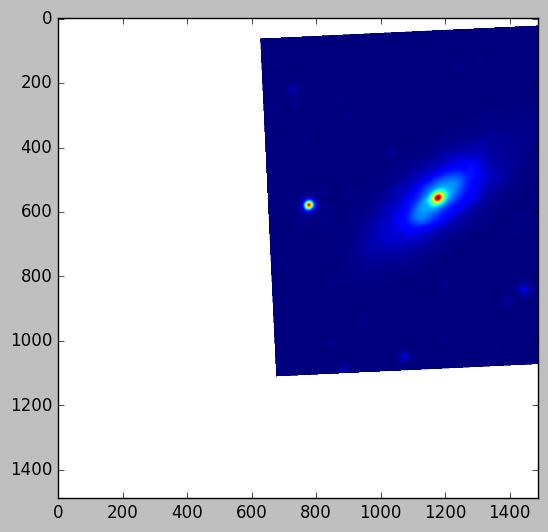

In [18]:
plt.figure(1)
plt.imshow(reproj1)

'''
The for loops have a range of 230 which is not the correct length of the data in the FITS files' arrays.
Not sure what sort of range to apply to these for loops
This code is giving an error of array indices being out of range and the for loops may be the result?
'''

In [19]:
###Vickys test starts here

In [40]:
new_image_array_WISE = [ [0] * Length_Range_WISE[0] for p in range(Length_Range_WISE[0])]
new_image_array_SDSS = [ [0] * Length_Range_SDSS[0] for p in range(Length_Range_SDSS[0])]
new_image_array_COMBINE = [ [0] * Length_Range_SDSS[0] for p in range(Length_Range_SDSS[0])]

In [21]:
def test_dim(testlist, dim=0):
### tests how many dimensions a list has
### copied from here: http://stackoverflow.com/questions/15985389/python-check-if-list-is-multidimensional-or-one-dimensional
   if isinstance(testlist, list):
      if testlist == []:
          return dim
      dim = dim + 1
      dim = test_dim(testlist[0], dim)
      return dim
   else:
      if dim == 0:
          return -1
      else:
          return dim

In [22]:
test_dim(new_image_array_WISE)

2

In [41]:
new_image_array_WISE = np.array(new_image_array_WISE)
new_image_array_WISE.shape

(302, 302)

In [42]:
new_image_array_SDSS = np.array(new_image_array_SDSS)
new_image_array_COMBINE = np.array(new_image_array_COMBINE)

In [46]:
x=1
y=1
newtestarrayWISE[0][y-1][x-1]

4.1404309

In [47]:
np.log10(newtestarrayWISE[0][y-1][x-1])

0.61704552

In [50]:
20.5 - 2.5*(np.log10(newtestarrayWISE[0][y-1][x-1]))

18.957386195659637

In [51]:
hdudataWISE[0][y-1][x-1]

4.1404309

In [55]:
20.5 - 2.5*(np.log10(hdudataWISE[0][y-1][x-1]))

18.957386195659637

In [56]:
test_image = 20.5 - (2.5*(np.log10(hdudataWISE[0])))

In [44]:
#print(newtestarrayWISE[0])#[0][0])
#print(newtestarray1[1])
for y in range(1, Length_Range_WISE[0]):
    for x in range(1, Length_Range_WISE[0]):
        #S_FluxTotal = np.sum(newtestarray2[0])
        a=(2.5*(np.log10(newtestarrayWISE[0][y-1][x-1])))
        
        new_image_array_WISE[y-1][x-1] = round(20.50000000000000, 8) - round(a,8) #W1-10a

        new_image_array_WISE[y-1][x-1] = 20.5 - (2.5*(np.log10(hdudataWISE[0][y-1][x-1])))
        
print(new_image_array_WISE)        
print(a)        #print new_image_array_WISE[0]        
## This still works because the indexing is still the same even though the arrays have been converted. But they'll be easier to work with later on.

[[18 18 18 ..., 18 18  0]
 [18 18 18 ..., 18 18  0]
 [18 18 18 ..., 18 18  0]
 ..., 
 [18 18 18 ..., 18 18  0]
 [18 18 18 ..., 18 18  0]
 [ 0  0  0 ...,  0  0  0]]
1.61209255457


In [26]:
for y in range(1, Length_Range_SDSS[0]):
    for x in range(1, Length_Range_SDSS[0]):
        #S_FluxTotal = np.sum(newtestarray2[0])      
        new_image_array_SDSS[y-1][x-1] = 25.11 - (2.5*(np.log10(newtestarraySDSS[1][y-1][x-1])))#SDSS-g
        #new_image_array3[y-1][x-1] = new_image_array2[y-1][x-1] - new_image_array1[y-1][x-1]              

In [27]:
hduWISE = fits.PrimaryHDU(new_image_array_WISE)#WISE
hduSDSS = fits.PrimaryHDU(new_image_array_SDSS)#SDSS
hdulistWISE = fits.HDUList([hduWISE])
hdulistSDSS = fits.HDUList([hduSDSS])

In [28]:
hdulistWISE

In [29]:
hdulistWISE.writeto('NewFileWISE.fits', clobber=True)
hdulistSDSS.writeto('NewFileSDSS.fits', clobber=True)

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                   64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  302                                                  
NAXIS2  =                  302                                                  
EXTEND  =                    T                                                  

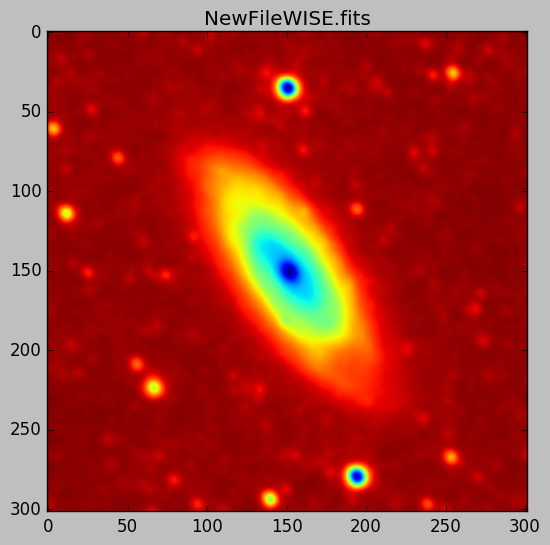

In [57]:
plt.figure(1)
plt.imshow(test_image)
plt.title('NewFileWISE.fits')

hdulistWISE[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                   64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 1489                                                  
NAXIS2  =                 1489                                                  
EXTEND  =                    T                                                  

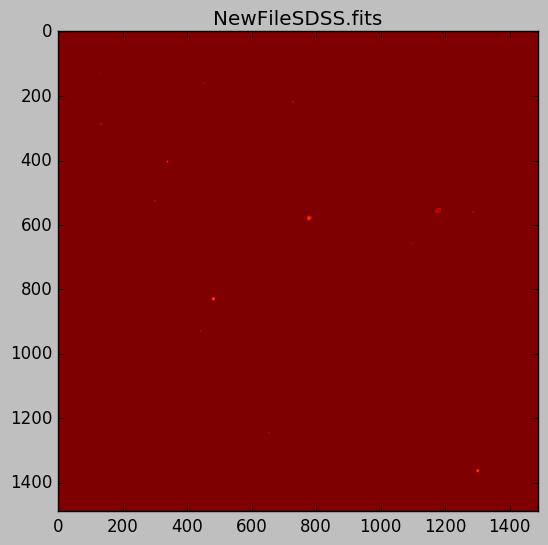

In [31]:


plt.figure(1)
plt.imshow(hdulistSDSS[0].data)
plt.title('NewFileSDSS.fits')

hdulistSDSS[0].header



In [32]:
Overlap_WISE = 'NewFileWISE.fits'
Overlap_SDSS = 'NewFileSDSS.fits'

#hdu_list_overlapA = fits.open(Overlap_A)
#hdu_list_overlapB = fits.open(Overlap_B)
image_overlap_dataWISE = fits.getdata(Overlap_WISE)
image_overlap_dataSDSS = fits.getdata(Overlap_SDSS)
shapeWISE = len(image_overlap_dataWISE)
shapeSDSS = len(image_overlap_dataSDSS)

In [33]:
image_overlap_dataWISE = np.array(image_overlap_dataWISE)
shapeWISE = image_overlap_dataWISE.shape
shapeWISE

(302, 302)

In [34]:
image_overlap_dataSDSS = np.array(image_overlap_dataSDSS)
shapeSDSS = image_overlap_dataSDSS.shape
shapeSDSS

(1489, 1489)

In [35]:
hduWISE = fits.open(get_pkg_data_filename('NewFileWISE.fits'))[0]
hduSDSS = fits.open(get_pkg_data_filename('NewFileSDSS.fits'))[0]
wcsWISE = WCS(hduWISE.header)
wcsSDSS = WCS(hduSDSS.header)

In [36]:
print 'wcsWISE'
print wcsWISE
print '\n'
print 'wcsSDSS'
print wcsSDSS

wcsWISE
WCS Keywords

Number of WCS axes: 2
CTYPE : ''  ''  
CRVAL : 0.0  0.0  
CRPIX : 0.0  0.0  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : 1.0  1.0  
NAXIS    : 302 302


wcsSDSS
WCS Keywords

Number of WCS axes: 2
CTYPE : ''  ''  
CRVAL : 0.0  0.0  
CRPIX : 0.0  0.0  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : 1.0  1.0  
NAXIS    : 1489 1489


18
17
0


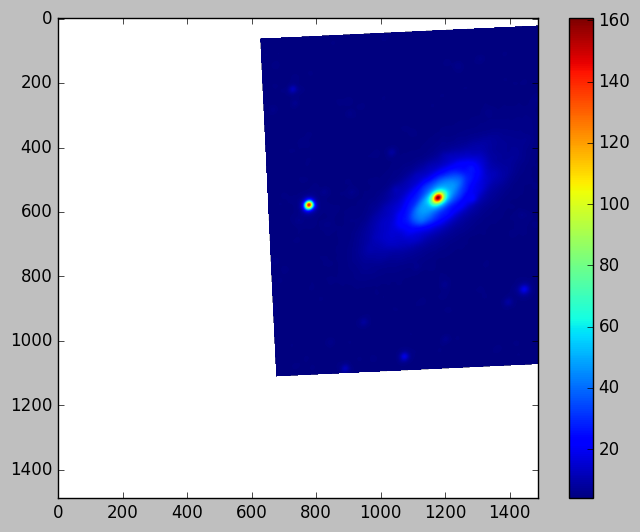

In [37]:
reproj1, footprint1 = reproject_interp(parsing_headerWISE[0], wcsSDSS1[1], shape_out=[Length_Range_SDSS[0],Length_Range_SDSS[0]])
#reproj2 = reproject_interp(hduB, wcs1, shape_out=len(image_overlap_dataB))
#print(footprint1)
#print( new_image_array2)
for y in range(1, 230):
    for x in range(1, 230):
        if footprint1[y-1][x-1] == 0:
            break
        else:
            new_image_array_COMBINE[y-1][x-1] = reproj1[y-1][x-1] - image_overlap_dataSDSS[y-1][x-1]
        
        #new_image_array3[y-1][x-1] = reproj1[y-1][x-1] - reproj2[y-1][x-1]
        #image_overlap_dataA[y-1][x-1] - image_overlap_dataB[y-1][x-1]

print(new_image_array_WISE[0][0])
print(new_image_array_SDSS[0][0])
print(new_image_array_COMBINE[0][0])  

plt.figure(1)
plt.imshow(reproj1)
plt.colorbar()

In [38]:
'''
So now this plot makes a lot more sense! Because both of your new images - 
NewFileWISE.fits and NewFileSDSS.fits - 
are missing all the WCS information from the header, 
the reproj code sets all the parameters to the default values. 
This means it thinks there isn't any reprojecting to do because the images are already in the same system.

Suggestions for next steps

There's a key point early on in your code that results in the images not having WCS information in the header. 
If you solve that issue, your code will work. 
I'm not going to tell you exactly what to do because you can absolutely get it yourself, 
    we just need to simplify the code a little bit (and that's a good thing).

Try to break up your code into steps, like I have here, 
    to find where the problem is and see if you could simplify what's going on at that stage. 
What are you doing to the images there? 
It's easier to get one thing working then to add a step than to try to add all the things at once.

Check what's actually in your variables, arrays, images, headers, etc at each stage too. 
Again, this is easier if you break it up into chunks. It's totally OK to have one line of code in a cell. 
Here's an example of some (what I thought initially would be simple) code that took me a looooong time to debug:
https://github.com/vickyscowcroft/ipython_notebooks/blob/master/simple_rrlyrae_lightcurves.ipynb 
If you look at the first 12 cells, I keep printing the same table and the length of the arrays out. 
That was because I was trying to match some tables using the name of the stars, 
   but the capital letters were messing everything up. 
It took literally days to fix, but the only way I could see what was going on was looking at what 
   was in the tables to see if they were what I thought they should be.

Comment your code! It will be really helpful to you later on if you write now what you think it should do, 
   what it actually does, and why you think it might not be doing what you think. 
Even something you think is super obvious now will not be in a weeks time. LEARN FROM MY MISFORTUNE.
'''

"\nSo now this plot makes a lot more sense! Because both of your new images - \nNewFileWISE.fits and NewFileSDSS.fits - \nare missing all the WCS information from the header, \nthe reproj code sets all the parameters to the default values. \nThis means it thinks there isn't any reprojecting to do because the images are already in the same system.\n\nSuggestions for next steps\n\nThere's a key point early on in your code that results in the images not having WCS information in the header. \nIf you solve that issue, your code will work. \nI'm not going to tell you exactly what to do because you can absolutely get it yourself, \n    we just need to simplify the code a little bit (and that's a good thing).\n\nTry to break up your code into steps, like I have here, \n    to find where the problem is and see if you could simplify what's going on at that stage. \nWhat are you doing to the images there? \nIt's easier to get one thing working then to add a step than to try to add all the things